# Support Vector Machine (SVM) - Detailed Theory

## 1. Introduction

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm that is primarily used for **classification** tasks but can also be adapted for **regression** (known as Support Vector Regression - SVR).

SVM works by identifying the **optimal hyperplane** that best separates the data points of different classes in a feature space.

---

## 2. The Core Idea of SVM

Given labeled training data, SVM tries to find the **decision boundary** (a hyperplane) that maximally separates the data points of different classes. The decision boundary is chosen such that the **margin** between the hyperplane and the nearest data points from each class is maximized.

These nearest points are known as **support vectors**. The position of the support vectors determines the orientation and location of the optimal hyperplane.

In two dimensions, the hyperplane is simply a line. In three dimensions, it is a plane. In higher dimensions, it is referred to as a hyperplane.

---

## 3. Linearly Separable vs Non-linearly Separable Data

- **Linearly Separable Data**: Data that can be separated by a straight line (or hyperplane in higher dimensions).
- **Non-linearly Separable Data**: Data that cannot be separated by a straight line.

For linearly separable data, SVM finds a straight hyperplane that separates the classes with the maximum margin.

For non-linearly separable data, SVM uses the **kernel trick** to map the data into a higher-dimensional space where a linear hyperplane can be used for separation.

---

## 4. The Margin and Support Vectors

- The **margin** is the distance between the hyperplane and the closest data points from either class.
- A **large margin** implies better generalization on unseen data.
- **Support vectors** are the data points that lie closest to the hyperplane. They are critical to the model as the hyperplane depends directly on them.

The objective of SVM is to **maximize this margin**.

---

## 5. Mathematical Formulation

### Objective:

Minimize the following function:

1/2 ||w||²


Subject to:

yᵢ (w · xᵢ + b) ≥ 1    for all i


Where:
- `w` is the weight vector perpendicular to the hyperplane
- `xᵢ` is the feature vector
- `yᵢ` is the class label (+1 or -1)
- `b` is the bias term

---

## 6. The Kernel Trick

When data is not linearly separable in the original space, SVM uses the **kernel trick** to project it into a higher-dimensional space where it becomes linearly separable.

### Common Kernels:

- **Linear Kernel**: `K(x, x') = x · x'`
- **Polynomial Kernel**: `K(x, x') = (γ x · x' + r)^d`
- **Radial Basis Function (RBF)**: `K(x, x') = exp(-γ ||x - x'||²)`
- **Sigmoid Kernel**: `K(x, x') = tanh(γ x · x' + r)`

Kernels allow SVM to fit the hyperplane in high-dimensional space **without explicitly computing the coordinates** in that space.

---

## 7. Regularization Parameter (C)

- The parameter `C` controls the trade-off between **maximizing the margin** and **minimizing the classification error**.
- A **smaller value of C** allows for a wider margin, but more misclassification.
- A **larger value of C** tries to classify all training examples correctly by choosing a smaller margin, which might lead to overfitting.

---

## 8. Gamma Parameter (γ)

- Used in non-linear kernels such as RBF and polynomial.
- Controls the influence of a single training example.
- A **low gamma** means a large similarity radius, resulting in smoother decision boundaries.
- A **high gamma** means a small radius, leading to tight fitting (possible overfitting).

---

## 9. Applications of SVM

- Image classification (e.g., face detection)
- Text classification (e.g., spam filtering)
- Bioinformatics (e.g., cancer classification from gene expression data)
- Handwriting recognition
- Intrusion detection systems

---

## 10. Advantages of SVM

- Effective in high-dimensional spaces
- Works well when there is a clear margin of separation between classes
- Still effective when the number of dimensions is greater than the number of samples
- Memory efficient since it uses a subset of training points (support vectors)

---

## 11. Limitations of SVM

- Not suitable for large datasets due to high training time
- Performance depends heavily on the choice of kernel and its parameters
- Not very effective when the data is heavily noisy and classes overlap
- No direct probabilistic interpretation (though probability calibration methods like Platt scaling can be used)

---

## 12. Summary

Support Vector Machine is a powerful algorithm for classification and regression tasks. It works by finding the hyperplane that maximizes the margin between classes. With the use of kernels, it can handle both linear and non-linear data. However, careful tuning of parameters like `C` and `gamma`, along with proper feature scaling, is essential for good performance.


Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



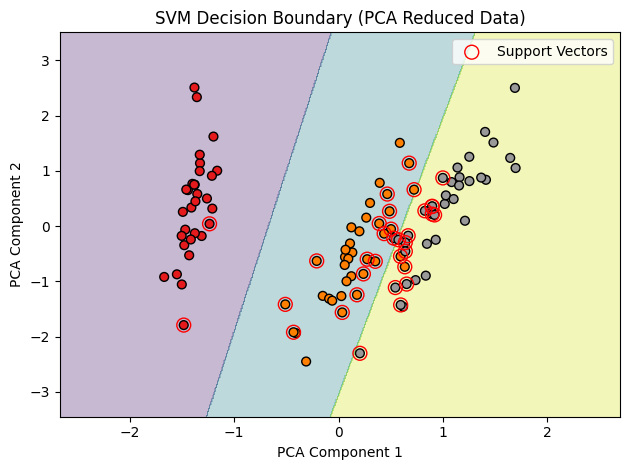

In [3]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data   # 4 features
y = iris.target # 3 classes

# Step 3: Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualize decision boundary
def plot_decision_regions(X, y, classifier, title):
    # Create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40, cmap=plt.cm.Set1)
    plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1],
                facecolors='none', edgecolors='r', s=100, label='Support Vectors')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_decision_regions(X_train, y_train, model, "SVM Decision Boundary (PCA Reduced Data)")
